<br>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import TypeVar

<br>

### Creating Type Hints

In [2]:
DataFrame = TypeVar('DataFrame', bound=pd.DataFrame)
Series = TypeVar('Series', bound=pd.Series)
Array = TypeVar('Array',bound=np.ndarray)

<br>

### Initial Read

In [3]:
Data=pd.read_csv('./QVI_data.csv')
Data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [4]:
Data.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

<br>

### Cleaning Product Names

In [5]:
# get all brands
Brands = pd.unique(Data["BRAND"])
Brands

array(['NATURAL', 'RRD', 'GRNWVES', 'WOOLWORTHS', 'CHEETOS', 'INFUZIONS',
       'DORITOS', 'OLD', 'SMITHS', 'KETTLE', 'CCS', 'TOSTITOS', 'COBS',
       'BURGER', 'THINS', 'TYRRELLS', 'CHEEZELS', 'TWISTIES', 'SUNBITES',
       'PRINGLES', 'FRENCH'], dtype=object)

In [6]:
# cleaning all product names for all brands
cp = Data.copy()
for brand in Brands:
    for prod in pd.unique(cp[cp["BRAND"]==brand].PROD_NAME):
        Data.replace({str(prod): ' '.join(str(prod).split())},inplace=True)

In [7]:
# check for na's
print("# of NA values:",Data.isna().sum().sum())

# of NA values: 0


<br>

### Restructuring Data for Total Sales Analysis

In [8]:
# filters Data by brand name -> returns Dataframe
def filter_by_brand(brand: str) -> DataFrame:
    return Data[Data["BRAND"]==brand]

# returns the unique product names for the given brand -> returns Array
def get_products_by_brand(brand: str) -> Array:
    return pd.unique(filter_by_brand(brand).PROD_NAME)

# sums the total sales for a brand's given product for a given date (could be relative date ~ monthly) -> returns Float
def sum_sales(product_name, date) -> float:
    temp = Data[Data["PROD_NAME"]==product_name]
    temp = temp[temp["DATE"].str.contains(date)]
    return temp["TOT_SALES"].sum()

# creates a date range list, grouped by month, between the min & max date of the entire dataframe -> returns List
def get_date_index() -> list:
    return ['-'.join(str(d).split('-')[:2]) for d in pd.date_range("2018-07","2019-07",freq="M")]

# makes a monthly dataframe per brand for all of the given months in the total data set,
# and computes the sum of all sales for each month, loaded in as values, for all of that brand's
# corresponding products -> returns Dataframe
def make_monthly_sale_frame(brand: str="") -> DataFrame:
    product_sales_by_month = pd.DataFrame(columns=get_products_by_brand(brand),index=get_date_index())
    for date in product_sales_by_month.index:
        product_sales_by_month.loc[date,:] = [sum_sales(prod, date) for prod in product_sales_by_month.columns]
    return product_sales_by_month

<br>

### Plot Utility Functions

In [9]:
# function to create a pie chart for a given brand's data for all their products,
# will display the percentage share of sales per product offered by the brand
def sales_pie_chart(df, 
                    full_title: str="", 
                    figsize: tuple=(10,14), 
                    pie_text_size: int=14, 
                    legend_text_size: int=15,
                    colors: list=None,
                   ) -> None:
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = df.columns
    sizes = (df.sum()/df.sum().sum()*100).values
    plt.figure(figsize=figsize)
    plt.pie(sizes,
            autopct='%0.2f%%',
            startangle=90,
            textprops={"fontsize":pie_text_size},
            wedgeprops={"linewidth": 1, 'width':1, "edgecolor":"k"},
            colors=colors,
            )
    plt.title(full_title,fontsize=15)
    plt.legend(labels=labels,
               loc='lower left',
               bbox_to_anchor=(1,0.5),
               title = "Product Names:",
               title_fontsize=legend_text_size,
               fontsize=legend_text_size
              )
    plt.show()

In [10]:
# function to create a bar chart for a given brand's data for all their products
def bar_chart(df,
             figsize: tuple=(10,4),
             title: str="",
             xlabel: str="",
             ylabel: str="",
             bar_width: int=1,
             rotation: int=90,
             colors: list=None,
             fontsize: int=10,
             ha: str="right",
             ) -> None:
    
    prod_names = df.columns
    values = df.sum()/df.sum().sum()*100
    plt.figure(figsize=figsize)
    plt.title(title,fontsize=fontsize)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.bar(prod_names,values,color=colors)
    plt.xticks(rotation=rotation,fontsize=fontsize,ha=ha)
    plt.show()

In [11]:
# function to create a heat map for a given brand's data for all their products
def heat_map(df,
             figsize: tuple=(10,5),
             font_scale: float=1.4,
             center: int=1500,
             linewidths: float=0.5,
             cmap: str="icefire"
            ) -> None:
    
    plt.figure(figsize=figsize)
    sns.set(font_scale=font_scale)
    hm = df[df.columns].astype('float')
    _ = sns.heatmap(hm,center=center,linewidths=linewidths,cmap=cmap)

In [12]:
# function to create a box plot for a given brand's data for all their products
def box_plot(df,
            rotation: int=0,
            ha: str="center",
            title: str="",
            ylabel: str="Total Sales",
            ) -> None:
    
    fig, ax = plt.subplots()
    ax.boxplot(df)
    plt.xticks(list(range(1,13)), 
               df.index, 
               rotation=rotation, 
               ha=ha)
    plt.title(title)
    plt.ylabel("Total Sales")
    plt.show()

In [13]:
# function to create a histogram plot for a given brand's data for all their products
def histogram(df,
            title: str="",
            linewidth: int=1,
            ) -> None:
    
    plt.hist(df,
             bins=range(int(df.min().min()),int(df.max().max()),int(df.mean().mean())),
             linewidth=linewidth)
    plt.xlabel("Sales Bins")
    plt.ylabel("Count")
    _ = plt.title(title)

In [14]:
# function to create a line plot comparing all products of a given brand over time
def lineplot(df,
             rotation: int=45,
             ylabel: str="Total Sales ($)",
             loc: str="center",
             anchor: tuple=(1.75,0.5),
             title: str="",
             title_fontsize: int=10,
             legend_fontsize: int=15,
             colors: list=None,
            ) -> None:
    
    if colors is not None:
        for col,color in zip(df,colors):
            plt.plot(df.index,df[col],label=col,color=color)
    else:
        for col in df:
            plt.plot(df.index,df[col],label=col)
            
    plt.xticks(rotation=rotation)
    plt.ylabel(ylabel)
    plt.title(title,fontsize=title_fontsize)
    _ = plt.legend(fontsize=legend_fontsize, loc=loc, bbox_to_anchor=anchor)

<br>

### Comparison of Sales Per Product 2018-2019: Cheetos, Doritos, and Pringles

In [15]:
# limit selection to ONLY cheetos vs doritos vs pringles
CHEETOS_SALES = make_monthly_sale_frame(brand="CHEETOS")
DORITOS_SALES = make_monthly_sale_frame(brand="DORITOS")
PRINGLES_SALES = make_monthly_sale_frame(brand="PRINGLES")

<br>

### Doritos

In [16]:
DORITOS_SALES.head()

,Doritos Cheese Supreme 330g,Doritos Mexicana 170g,Doritos Corn Chip Southern Chicken 150g,Doritos Corn Chips Cheese Supreme 170g,Doritos Corn Chips Original 170g,Doritos Salsa Medium 300g,Doritos Salsa Mild 300g,Doritos Corn Chips Nacho Cheese 170g,Dorito Corn Chp Supreme 380g,Doritos Corn Chip Mexican Jalapeno 150g
2018-07,2570.7,2147.2,2187.9,2362.8,2182.4,626.6,626.6,2354.0,3542.5,2238.6
2018-08,2673.3,2257.2,1895.4,2248.4,2107.6,595.4,543.4,2072.4,2967.25,2020.2
2018-09,3226.2,2217.6,2172.3,2208.8,2186.8,639.6,618.8,2235.2,3185.0,1727.7
2018-10,2747.4,2455.2,1965.6,2420.0,2279.2,590.2,668.2,2274.8,3386.5,2063.1
2018-11,2610.6,2063.6,2242.5,2164.8,2147.2,585.0,548.6,2222.0,3555.5,1840.8


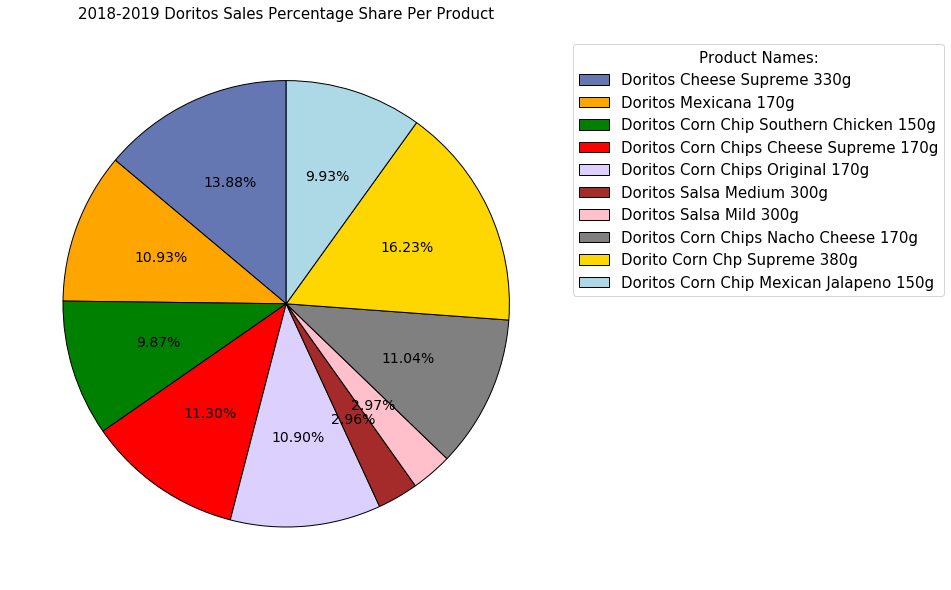

In [17]:
# all Doritos products sales percentage for both 2018 & 2019 Pie Chart
sales_pie_chart(DORITOS_SALES,
                full_title="2018-2019 Doritos Sales Percentage Share Per Product",
                colors=["#6577B3","orange","green","red","#DCD0FF","brown","pink","grey","#FFD700","#ADD8E6"])

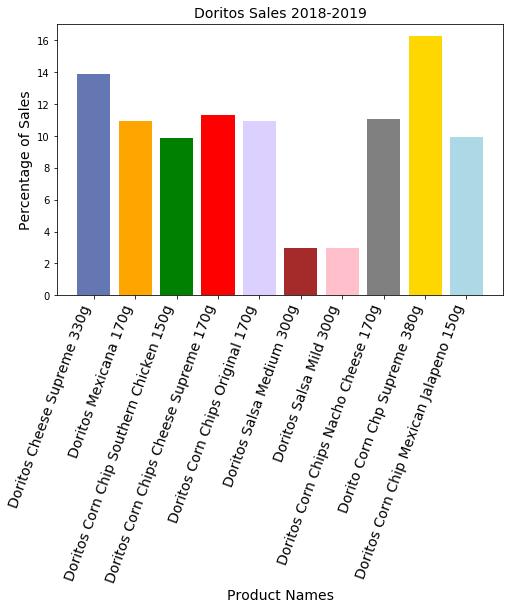

In [18]:
# all Doritos products sales percentage for both 2018 & 2019 Bar Chart
bar_chart(DORITOS_SALES,
          title="Doritos Sales 2018-2019",
          xlabel="Product Names",
          ylabel="Percentage of Sales",
          figsize=(8,5),
          colors=["#6577B3","orange","green","red","#DCD0FF","brown","pink","grey","#FFD700","#ADD8E6"],
          fontsize=14,
          rotation=70)

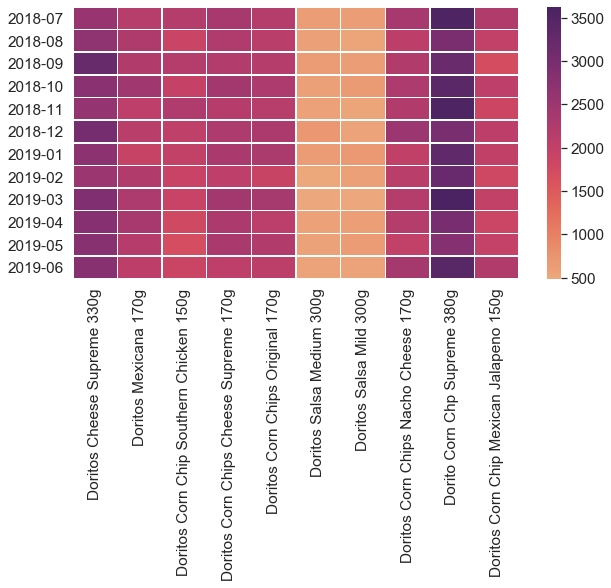

In [19]:
# make heat map for the Doritos products
heat_map(DORITOS_SALES,
         figsize=(10,5),
         font_scale=1.4,
         center=DORITOS_SALES.mean().mean(),
         linewidths=.5,
         cmap="flare")

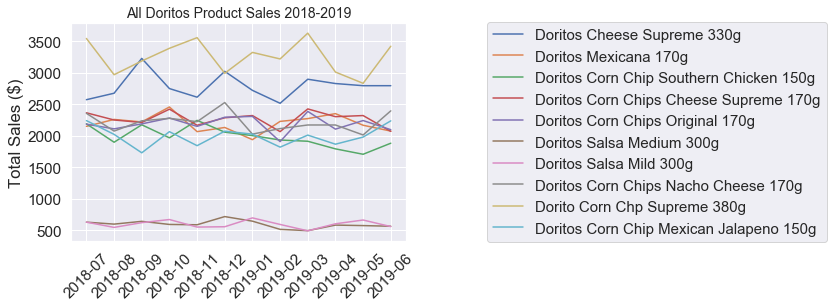

In [20]:
# comparing all doritos products
lineplot(DORITOS_SALES, title="All Doritos Product Sales 2018-2019", title_fontsize=14)

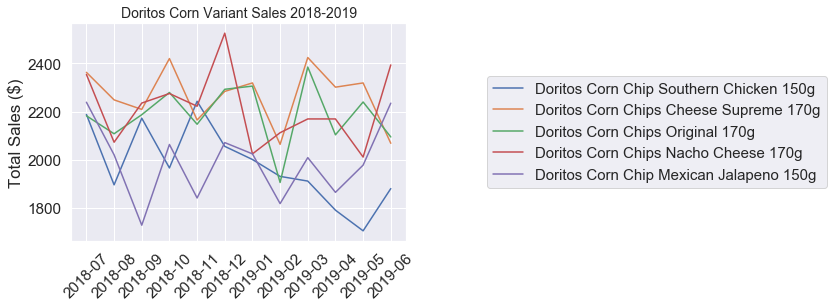

In [21]:
# comparing all Corn variants 
mask = DORITOS_SALES.columns.str.match('^Doritos Corn')
desired = DORITOS_SALES.loc[:,mask]
lineplot(desired, 
         title="Doritos Corn Variant Sales 2018-2019", 
         title_fontsize=14)

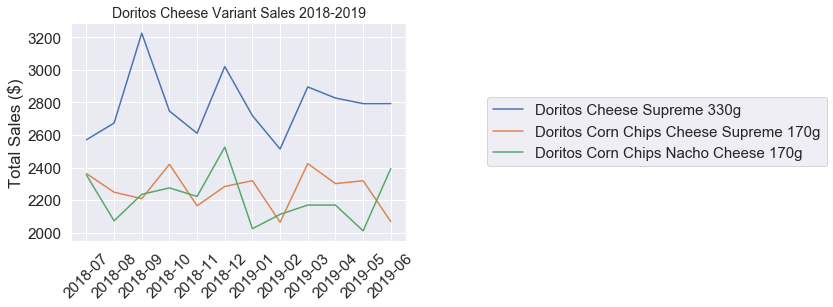

In [22]:
# comparing all Cheese variants 
mask = DORITOS_SALES.columns.str.contains('Cheese')
desired = DORITOS_SALES.loc[:,mask]
lineplot(desired, title="Doritos Cheese Variant Sales 2018-2019", title_fontsize=14)

<br>

### Cheetos

In [23]:
CHEETOS_SALES.head()

,Cheetos Puffs 165g,Cheetos Chs & Bacon Balls 190g
2018-07,686.0,841.5
2018-08,677.6,841.5
2018-09,616.0,742.5
2018-10,669.2,943.8
2018-11,596.4,782.1


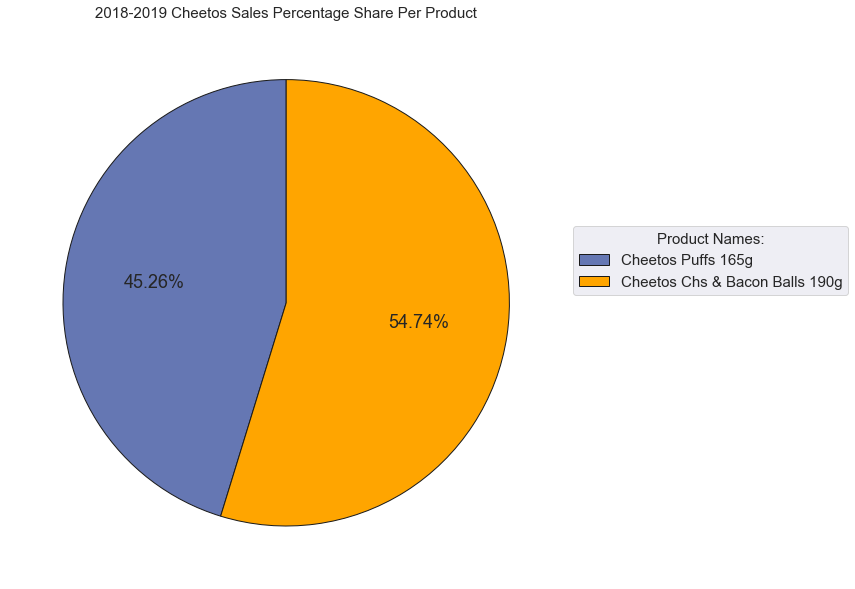

In [24]:
# plot pie chart for 2018-2019 Cheetos sales
sales_pie_chart(CHEETOS_SALES,
                full_title="2018-2019 Cheetos Sales Percentage Share Per Product",
                pie_text_size=18,
                colors=["#6577B3","orange"])

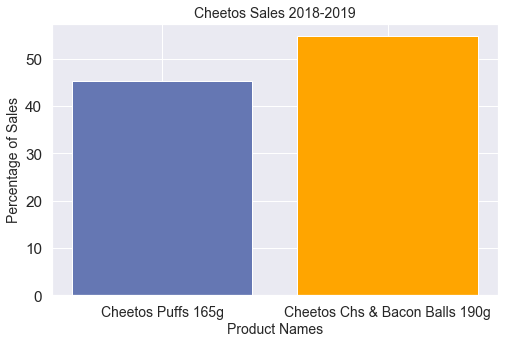

In [25]:
# plot bar chart for 2018-2019 Cheetos sales
bar_chart(CHEETOS_SALES,
          title="Cheetos Sales 2018-2019",
          xlabel="Product Names",
          ylabel="Percentage of Sales",
          figsize=(8,5),
          colors=["#6577B3","orange"],
          fontsize=14,
          rotation=0,
          ha="center")

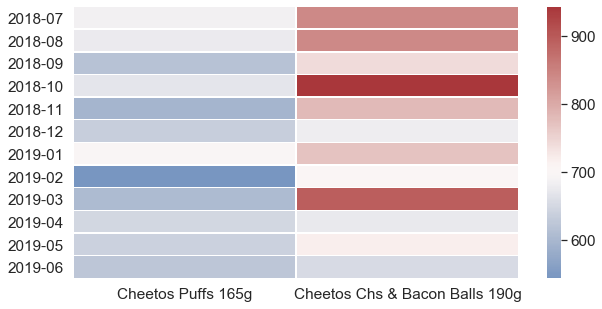

In [26]:
# make heat map for the Cheetos products
heat_map(CHEETOS_SALES,
         figsize=(10,5),
         font_scale=1.4,
         center=CHEETOS_SALES.mean().mean(),
         linewidths=.5,
         cmap="vlag")

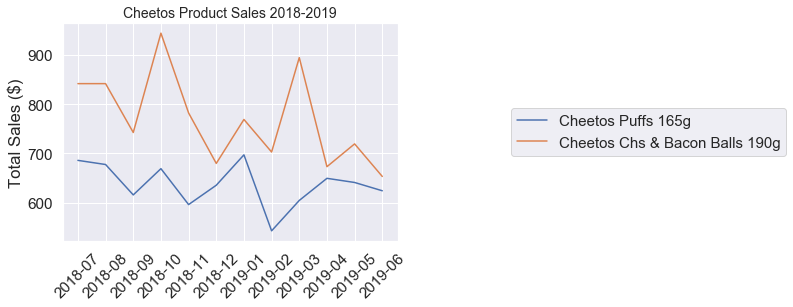

In [27]:
# comparing all cheetos products
lineplot(CHEETOS_SALES, title="Cheetos Product Sales 2018-2019", title_fontsize=14)

<br>

### Pringles

In [28]:
PRINGLES_SALES.head()

,Pringles Sthrn FriedChicken 134g,Pringles Chicken Salt Crips 134g,Pringles Mystery Flavour 134g,Pringles Barbeque 134g,Pringles Sweet&Spcy BBQ 134g,Pringles SourCream Onion 134g,Pringles Original Crisps 134g,Pringles Slt Vingar 134g
2018-07,1809.3,1983.2,1868.5,1938.8,1968.4,1998.0,1949.9,1764.9
2018-08,1724.2,1927.7,1702.0,1620.6,1942.5,1935.1,1757.5,1961.0
2018-09,1798.2,1853.7,1794.5,2064.6,1864.8,1809.3,2153.4,2023.9
2018-10,1916.6,1894.4,1798.2,1942.5,1705.7,1883.3,1813.0,1827.8
2018-11,1990.6,1901.8,1879.6,1961.0,2331.0,1938.8,1783.4,1705.7


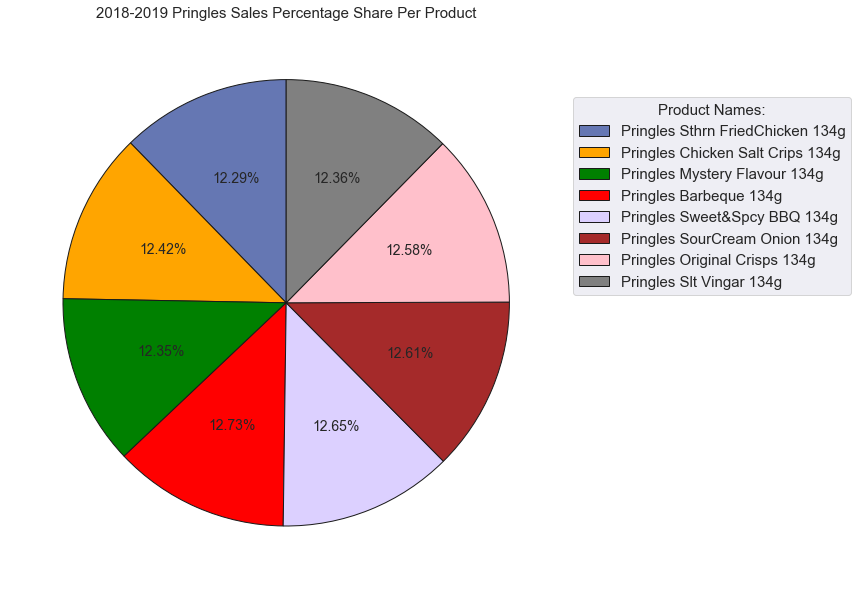

In [29]:
# all Pringles products sales percentage for both 2018 & 2019 Pie Chart
sales_pie_chart(PRINGLES_SALES,
                full_title="2018-2019 Pringles Sales Percentage Share Per Product",
                colors=["#6577B3","orange","green","red","#DCD0FF","brown","pink","grey"])

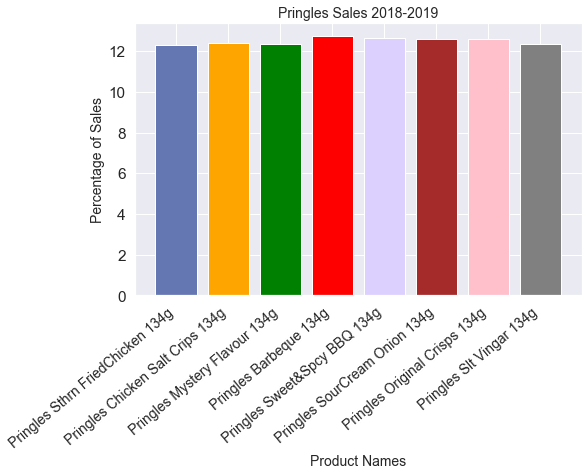

In [30]:
# plot bar chart for 2018-2019 Pringles sales
bar_chart(PRINGLES_SALES,
          title="Pringles Sales 2018-2019",
          xlabel="Product Names",
          ylabel="Percentage of Sales",
          figsize=(8,5),
          colors=["#6577B3","orange","green","red","#DCD0FF","brown","pink","grey"],
          fontsize=14,
          rotation=40,
          ha="right")

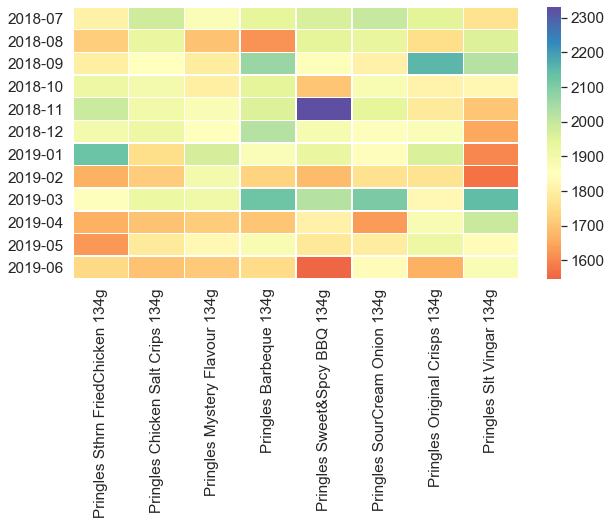

In [31]:
# make heat map for the Pringles products
heat_map(PRINGLES_SALES,
         figsize=(10,5),
         font_scale=1.4,
         center=PRINGLES_SALES.mean().mean(),
         linewidths=.5,
         cmap="Spectral")

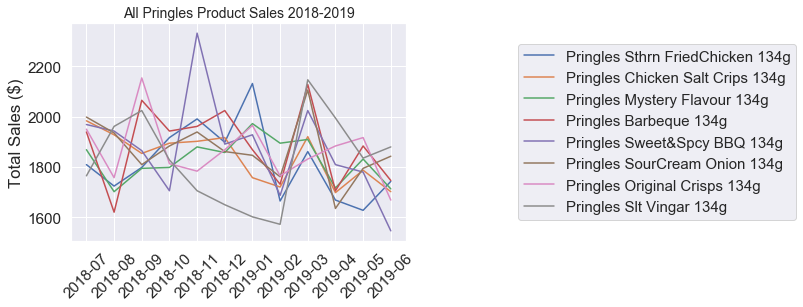

In [32]:
# comparing all pringles products
lineplot(PRINGLES_SALES, title="All Pringles Product Sales 2018-2019", title_fontsize=14)

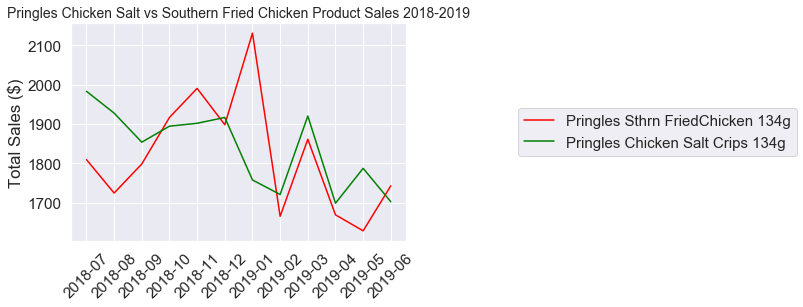

In [33]:
# comparing pringles fried chicken vs chicken salt
mask = PRINGLES_SALES.columns.str.contains(r'Chicken')
desired = PRINGLES_SALES.loc[:,mask]
lineplot(desired, 
        title="Pringles Chicken Salt vs Southern Fried Chicken Product Sales 2018-2019", 
         title_fontsize=14,
         colors=["red","green"])

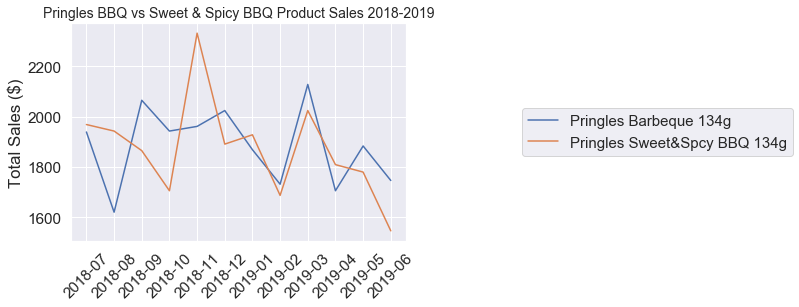

In [34]:
# comparing pringles bbq / sweet & spicy bbq 
mask = PRINGLES_SALES.columns.str.contains(r'Barbeque|BBQ')
desired = PRINGLES_SALES.loc[:,mask]
lineplot(desired, 
        title="Pringles BBQ vs Sweet & Spicy BBQ Product Sales 2018-2019", 
         title_fontsize=14)